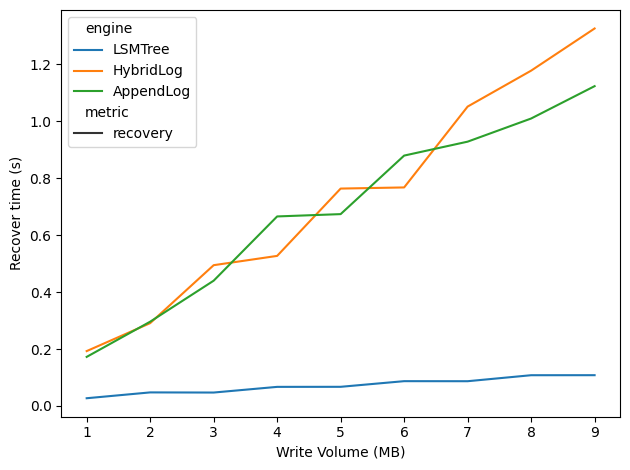

In [1]:
import sys
import pandas as pd
import seaborn as sns
from numpy import percentile
from utils import run
from distributions import Uniform, Zipfian
from kevo import LSMTree, AppendLog, HybridLog, MemOnly, PathRemote
from pygav.data import lineplot, barplot, relplot
from pygav.utils import Timer
from utils import run, measure_writes, measure_recovery


df = run(
    [5], [5], [100_000], list(range(100_000, 1_000_000, 100_000)),
    [Uniform], [{'seed': [1]}],
    [LSMTree, HybridLog, AppendLog], [{
        'max_runs_per_level': [10],
        'density_factor': [10],
        'memtable_bytes_limit': [100_000],
        'remote': [None]
    },
    {
        'max_runs_per_level': [10],
        'ro_lag_interval': [10_000],
        'flush_interval': [10_000],
        'hash_index': ['dict'],
        'remote': [None]
    },
    {
        'max_runs_per_level': [10],
        'threshold': [100_000],
        'compaction': [False],
        'remote': [None]
    }],
    [measure_writes, measure_recovery], {}
)

data = df[['metric', 'value', 'engine', 'n_ops']]
data = data[data['metric'] == 'recovery']
data['n_ops'] = data['n_ops'] / 100000

lineplot(data=data, x='n_ops', y='value', hue='engine', style='metric',
         filename='recovery.pdf', xlabel='Write Volume (MB)',
         ylabel='Recover time (s)')